# Introduction
In this notebook, insights will be created from the dataset we're going to use. The dataset in question will be one that tracks the alcohol consumption among students from two different classes: math and portuguese. The data can be found here: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

## Story
The teacher in Portuguese is worried about the current grades of the students. He suspects that there's an increase in alcohol consumption and is afraid that this will lead to more students failing his class. He called you to investigate the data that's available. Your job is to find possible relationships in the data and give recommendations how to improve the grades, whilst remaining populairity for the principal and moral for the students.

## Overview
In order to create insight into the data and reach our goal, the following actions will be taken:
1. The goal we'll want to achieve.
2. Import and clean the data
3. Build different types of visualizations
4. Find linear relationships in the data
5. Investigate distributions of features
6. Perform hypothesis testing

# Goal
Our goal is to find possible negative relationships with the students performance from the Portuguese class with other features of the dataset.

# Import and clean the data
In this chapter, the data will be imported and cleaned.

## Import

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import poisson

In [2]:
# Import the dataset
studs_por = pd.read_csv("student-por.csv")

# Show the columns with non-null values and datatype
studs_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## Clean the data
In this paragraph, the data will be cleaned. In order to do that, the following actions will be taken:
- Select necessary features
- Deal with null-values
- Deal with possible outliers
- Convert certain columns to appropriate types
- Dealing with values that need to be remapped
- Add extra feature: tot_alc_consum

We don't need to deal with null values, because we can see that there are none in the data set based on the info method above.

### Select necessary features
In this paragraph, the necessary features will be selected. We'll select based on the ones that are needed for our visualization and hypothesis testing.

In [3]:
# Take the columns for our feature selection
cols = ["sex","age", "nursery", "absences", "failures", "famrel", "Dalc", "Walc", "G1", "G2", "G3"]

df = studs_por[cols]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       649 non-null    object
 1   age       649 non-null    int64 
 2   nursery   649 non-null    object
 3   absences  649 non-null    int64 
 4   failures  649 non-null    int64 
 5   famrel    649 non-null    int64 
 6   Dalc      649 non-null    int64 
 7   Walc      649 non-null    int64 
 8   G1        649 non-null    int64 
 9   G2        649 non-null    int64 
 10  G3        649 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 55.9+ KB


### Deal with null-values

In [4]:
# We can see that they're no null values to deal with
df.isnull().sum()

sex         0
age         0
nursery     0
absences    0
failures    0
famrel      0
Dalc        0
Walc        0
G1          0
G2          0
G3          0
dtype: int64

### Deal with possible outliers

In [5]:
print(df.describe())

              age    absences    failures      famrel        Dalc        Walc  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    3.659476    0.221880    3.930663    1.502311    2.280431   
std      1.218138    4.640759    0.593235    0.955717    0.924834    1.284380   
min     15.000000    0.000000    0.000000    1.000000    1.000000    1.000000   
25%     16.000000    0.000000    0.000000    4.000000    1.000000    1.000000   
50%     17.000000    2.000000    0.000000    4.000000    1.000000    2.000000   
75%     18.000000    6.000000    0.000000    5.000000    2.000000    3.000000   
max     22.000000   32.000000    3.000000    5.000000    5.000000    5.000000   

               G1          G2          G3  
count  649.000000  649.000000  649.000000  
mean    11.399076   11.570108   11.906009  
std      2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000  
25%     10.000000   10.000000   10.000000  
50%   

#### Findings
Based on the describe method, the column absences needs to be rechecked because it has a maximum ob 32. A box plot will be drawn to check for possible outlier. Also, the distribution of age will be drawn to check if every age is distributed enough.

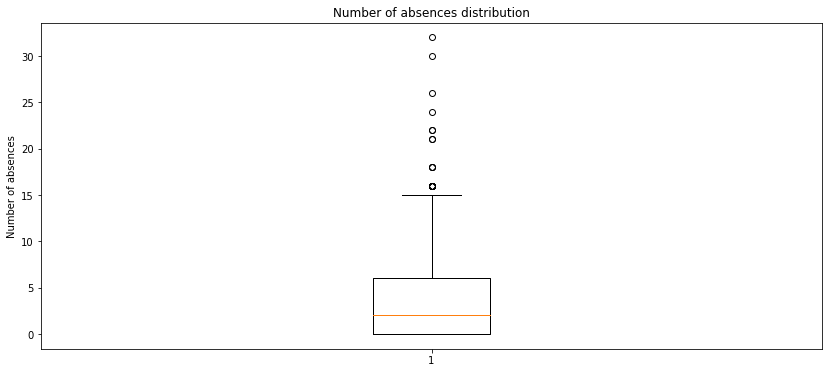

In [6]:
# Draw box plot based on sns
# Draw boxplots of the sets using seaborn
fig, ax = plt.subplots(ncols = 1, figsize=(14, 6))

# Draw first boxplot 
ax.boxplot(df.absences, vert = True)
ax.set_title("Number of absences distribution")
ax.set_ylabel("Number of absences")

plt.show()

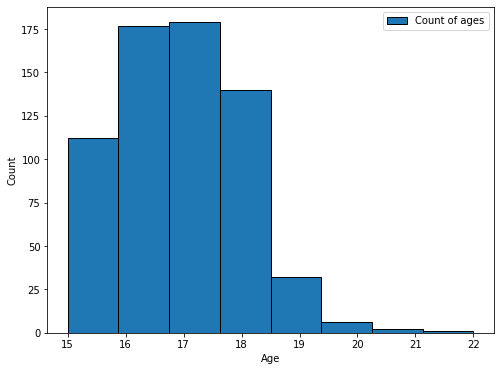

In [7]:
# Draw histogram to show distribution of the age column
fig, ax = plt.subplots(figsize=(8, 6))

# Draw first boxplot 
ax.hist(df.age, edgecolor = 'black', bins = 8, label = "Count of ages")
ax.set(xlabel = "Age", ylabel = "Count")
ax.legend()
  
plt.show()

In [8]:
# Get the count of each age
data = df.groupby('age').agg({'age': 'count'})
print(data)

     age
age     
15   112
16   177
17   179
18   140
19    32
20     6
21     2
22     1


#### Findings
Based on the boxplot, we can see that the're a few outliers when it comes to number of `absences` from students. However, since they're not far from the 3rd quantile, they won't affect the data distribution enough to remove/modify them.

For the `age` column, we see that the age 20 to 22 are barely represented. If we look in it more close, we see that they have a total of 8 rows. In order to get the best representation of the data, they will be removed.

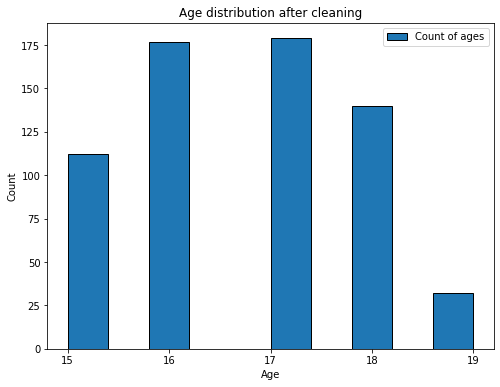

In [9]:
# Remove rows that have an age of 20 or higher
df = df.loc[df['age'] < 20]

# Draw histogram to show distribution of the age column after it got cleaned
fig, ax = plt.subplots(figsize=(8, 6))

# Draw histogram
xticks = [x for x in range(15, 20)]
ax.hist(df.age, edgecolor = 'black', label = "Count of ages")
ax.set(xlabel = "Age", ylabel = "Count", title = "Age distribution after cleaning")
ax.legend()
ax.set_xticks(xticks)

# Show plot
plt.show()

### Convert certain columns to appropriate types
Upon review, the following columns need to be converted to the appropiate datatype:
- sex : to category
- nursery: to boolean

In [10]:
# Convert to category
df['sex'] = df['sex'].astype('category')

# Map values to True and False and convert the datatype to boolean
df['nursery'] = df['nursery'].map({'yes': True, 'no': False})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 648
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sex       640 non-null    category
 1   age       640 non-null    int64   
 2   nursery   640 non-null    bool    
 3   absences  640 non-null    int64   
 4   failures  640 non-null    int64   
 5   famrel    640 non-null    int64   
 6   Dalc      640 non-null    int64   
 7   Walc      640 non-null    int64   
 8   G1        640 non-null    int64   
 9   G2        640 non-null    int64   
 10  G3        640 non-null    int64   
dtypes: bool(1), category(1), int64(9)
memory usage: 51.4 KB
None


## Add extra feature: tot_alc_consum
In this paragraph, an extra feature will be added to the data: tot_alc_consum. This contains the sum of Dalc and Walc in order to retrive the total alcohol consumption score from the students. Since both Dalc and Walc has a minimum of 1 and a maximum of 5, the new feature will range between 2 and 10.

In [11]:
# Add new feature: tot_alc_consum
df['tot_alc_consum'] = df.Dalc + df.Walc

# Show head of dataframe with new feature
df.head()

,sex,age,nursery,absences,failures,famrel,Dalc,Walc,G1,G2,G3,tot_alc_consum
0,F,18,True,4,0,4,1,1,0,11,11,2
1,F,17,False,2,0,5,1,1,9,11,11,2
2,F,15,True,6,0,4,2,3,12,13,12,5
3,F,15,True,0,0,3,1,1,14,14,14,2
4,F,16,True,0,0,4,1,2,11,13,13,3


# Build different types of visualizations
Visualizations:
- Age vs alcohol consumption
- G1, G2 & G3 vs alcohol consumption
- Absences per age
- Absences vs G1, G2 & G3

## Age vs Dalc & Walc consumption
In this chapter, the average alcohol consumption on weekdays and weekend will be shown.

In [12]:
# Group by age and get the mean of Dalc and Walc respectively
data = df.groupby('age')['Dalc', 'Walc'].mean()

# Set up parameters
width = 0.35
alpha = 0.5
x = data.index
y1 = data.Dalc
y2 = data.Walc

labels = ["Weekdays", "Weekend"]
xlabel = "Age of students"
ylabel = "Average alcohol consumption \n (1: very low, 5: very high)"
title = "Alcohol consumption on weekdays and weekends per age group"
colors = ['red', 'green']
edgecolor = 'black'

C:\Users\ardejong\AppData\Local\Temp/ipykernel_13520/1055293737.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby('age')['Dalc', 'Walc'].mean()


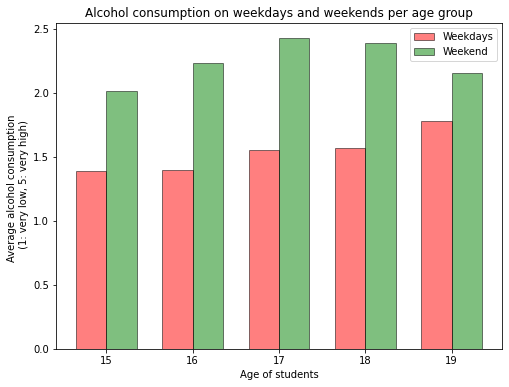

In [13]:
# Create figure with axes
fig, ax = plt.subplots(figsize = (8, 6))

# Create the plots
# Create two bar plots: one for weekdays and one for weekend
ax.bar(x, y1, color = colors[0], alpha = alpha, label = labels[0], width = width,
      edgecolor = edgecolor)
ax.bar(x + width, y2, color = colors[1], alpha = alpha, label = labels[1], width = width,
      edgecolor = edgecolor)
# Set the xticks so that there between the two bar plots
ax.set_xticks(x + width / 2)
ax.set_xticklabels(x.unique())

# Set labels and title
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(title)

# Show plot with legend
plt.legend()
plt.show()

### Findings
Alcohol consumption is generally higher in the weekend than on workdays. We also see a slight increase in the alcohol consumption on the weekends as the age increases. However, after the age of 17, we see that the alcohol consumption slightly decreases and the consumption on the weekdays increases

## G1, G2 & G3 vs Alcohol consumption
In this chapter, the grades will be compared to the total alcohol consumption.

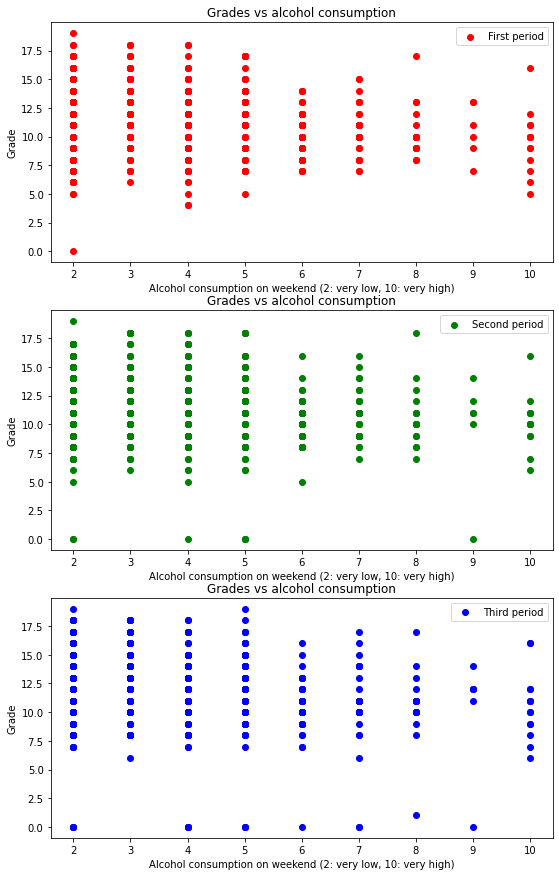

In [14]:
fig, ax = plt.subplots(nrows = 3, figsize = (9, 15))

# Set up parameters
x = df.tot_alc_consum
y1 = df.G1
y2 = df.G2
y3 = df.G3

# Create the scatter plots
ax[0].scatter(x, y1, color = 'red', label = 'First period')
ax[1].scatter(x, y2, color = 'green', label = 'Second period')
ax[2].scatter(x, y3, color = 'blue', label = 'Third period')

# Set labels and title of suplots using a for loop
for axes in ax.flat:
    axes.set_xlabel("Alcohol consumption on weekend (2: very low, 10: very high)")
    axes.set_ylabel("Grade")
    axes.set_title("Grades vs alcohol consumption")
    axes.legend()

# Show the subplots
plt.show()

### Findings
Based on the scatter plots, we can see that when the alcohol consumption increases, that after the score of 5 or higher, the maximum grades aren't as high as on the low alcohol consumption. We also see less variance.

## Absences per age
In this chapter, the number of absences per age will be shown.

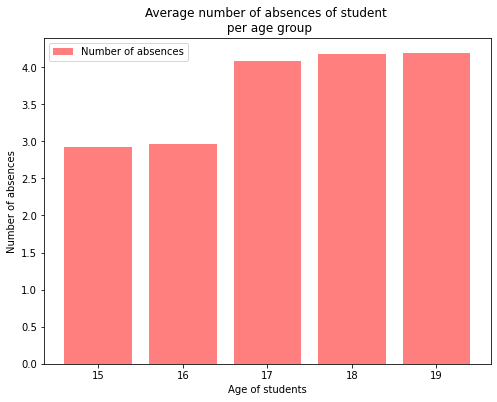

In [15]:
# Create the figure and axes
fig, ax = plt.subplots(figsize = (8, 6))

# Get average number of absences per age
data = df.groupby('age')['absences'].mean()

# Create bar plot to show number of absences per age group
ax.bar(data.index, data.tolist(), color = 'red', alpha = 0.5, label = "Number of absences")
ax.set_xlabel("Age of students")
ax.set_ylabel("Number of absences")
ax.set_title("Average number of absences of student \n per age group")

# Show plots 
plt.legend()
plt.show()

### Findings
The number of absences are the highest among the age of 17 to 19, with an average of around 4 absences. 15 and 16 are significantly lower, with an average of 3.

## Absences vs Grades

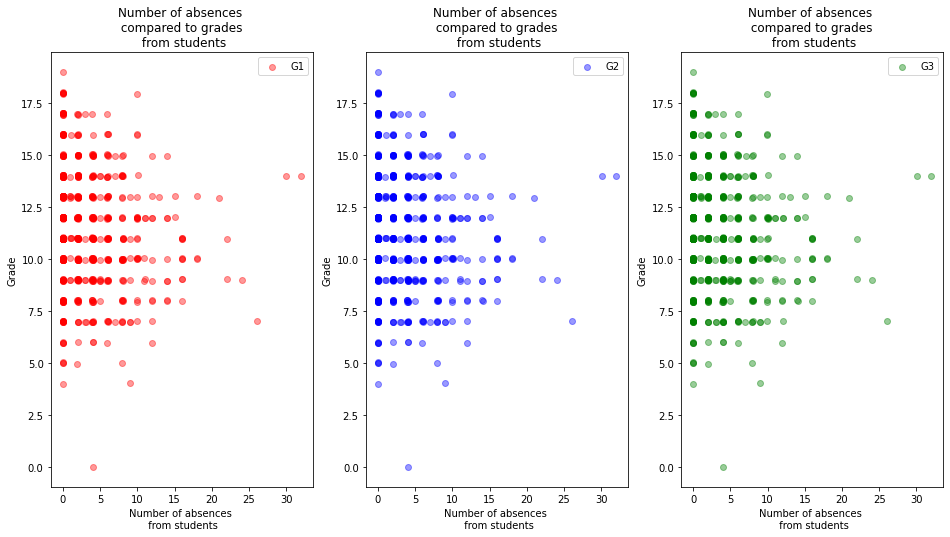

In [16]:
# Create scatter plot: x (absences) y (grades)
fig, ax = plt.subplots(ncols = 3, figsize = (16, 8))

# Set up parameters
# Add jitter on x and y axis so values don't overlap each other
jitter = 0.1
x = df.absences + jitter * np.random.rand(len(df.absences)) -0.05
y1 = df.G1 + jitter * np.random.rand(len(df.G1)) -0.05
y2 = df.G2 + jitter * np.random.rand(len(df.G2)) -0.05
y3 = df.G3 + jitter * np.random.rand(len(df.G3)) -0.05

# Set labels and title
xlabel = "Number of absences \n from students"
ylabel = "Grade"
title = "Number of absences \n compared to grades \n from students"

# Other parameters
alpha = 0.4
colors = ['red', 'blue', 'green']
labels = ['G1', 'G2', 'G3']

# Create subplots using a for loop
for axes, y, color, label in zip(ax.flat, [y1, y2, y3], colors, labels):
    axes.scatter(x, y1, facecolor = color, alpha = alpha, label = label)

    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    axes.legend()
    
plt.show()

### Findings
We see some comparable results from the scatters plots about the number of absences with the ones from the alcohol consumption: lower maximum grades and less variance.

# Find linear relationships in the data
In this chapter, the linear releationships will be found in the data. This will be done by using a correlation matrix.

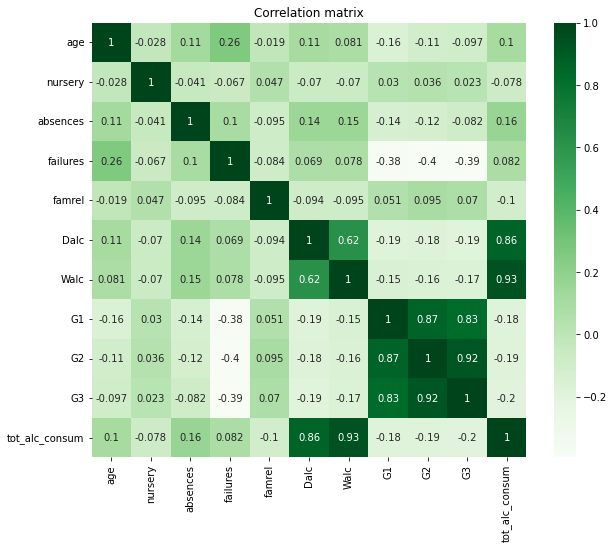

In [17]:
cor = df.corr()

# Display the correlation matrix
fig, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(cor, annot=True, cmap = 'Greens', ax = ax, square = True)
plt.title("Correlation matrix")
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

### Findings
The first correlations that stand out are the grades. G1 has a correlation of 0.86 with G2 and 0.83 with G3, whilst G2 and G3 have a correlation of 0.92. This shows a strong positive correlation within the gotten grades of each period. This also goes for the tot_alc_consum compared to the Dalc and Walc columns.

The other strong positive correlation found was between Dalc (Alcohol consumption on weekdays) and Walc (Alcohol consumption on weekends).

One correlation that's a quite noticable is the correlation between failures and age (0.32). This indicates a semi weak positive correlation.

We can also see some other indications of a linear relationship:
- Failures and grades: -0.38 and -0.39 (semi weak negative correlation)
- Alcohol consumption and grades: -0.18 (G1), -0.19 (G2), -0.2 (G3) (weak negative correlation)
- Dalc and grades: -0.19 and -0.2 (weak negative correlation)
- Walc and grades: -0.16 and 0.18 (weak negative correlation)
- absences and G1 and G2: -0.15 and -0.12 
- absences and alcohol consumption (Dalc and Walc): 0.17 and 0.16 (small positive correlation)

All other correlation are to little to call it a potential linear relationship

# Investigate distributions of features
In this chapter, the distributions of the features will be shown. After that, some conclusions will be drawn from those distributions.

The distributions will mostly be done for the features we're going to use for our hypothesis testing later:
- G3
- G2
- G1
- Dalc
- Walc
- tot_alc_consum

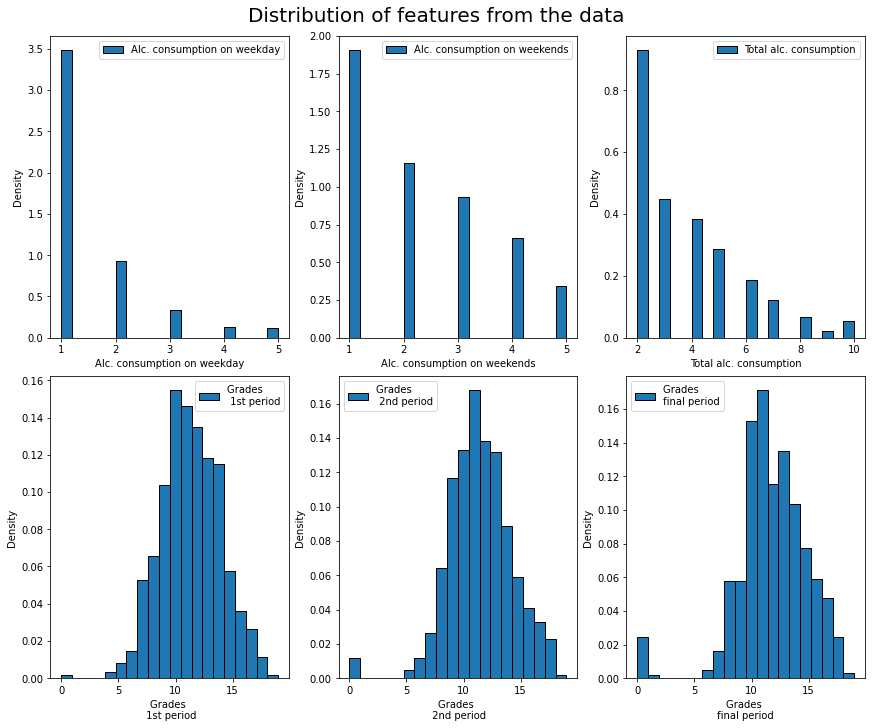

In [18]:
# Create distribution of features using subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 10),
                        constrained_layout=True)

# Set up the parameters
cols = ['Dalc', 'Walc', "tot_alc_consum", 'G1', 'G2', 'G3']
labels = ["Alc. consumption on weekday", "Alc. consumption on weekends",
          "Total alc. consumption", "Grades \n 1st period", 
          "Grades \n 2nd period", "Grades \nfinal period"]
title = "Distribution of features from the data"

# Create distibution plots using a for loop
for ax, col, label in zip(axes.flat, cols, labels):
    ax.hist(df[col], edgecolor = 'black', bins = 20, label = label, density = True)
    ax.set(xlabel = label, ylabel = "Density")
    ax.legend()
    
fig.suptitle(title, fontsize=20)   

plt.show()

## Findings
Based on the histograms, we can see the following distributions:
- G1, G2 and G3: T-distribution
- Dalc, Walc and tot_alc_consum: Poission

Each distribution will be justified below.

### G1, G2, G3: Normal distribution
The grades columns have a T-distribution. A T-distribution is similar to a normal distribution, except it has heavier “tails” than the normal distribution. This is because of the following reasons:
1. The bulk of the observations generated from a normal distribution lie near the mean. Also, the median and mean coincide within each other. See the code cell below for proof.
2. The distributions of the columns have the shape of a bell curve.
3. In order to further prove it's a normal distribution, we'll draw a normal distribution plot from random generated numbers. We'll do that for all three columns

In [19]:
# Print the median and mean values to show that they coincide with each other
# Set up data to for loop
cols = [df.G1, df.G2, df.G3]
labels = ["G1", "G2", "G3"]

# Print mean and median using for loop
for col, label in zip(cols, labels):
    print(f"{label}:")
    print(f"The median of {label} is: {np.median(col)}")
    print(f"The mean of {label} is: {np.mean(col)}\n")

G1:
The median of G1 is: 11.0
The mean of G1 is: 11.4234375

G2:
The median of G2 is: 11.0
The mean of G2 is: 11.5734375

G3:
The median of G3 is: 12.0
The mean of G3 is: 11.91875



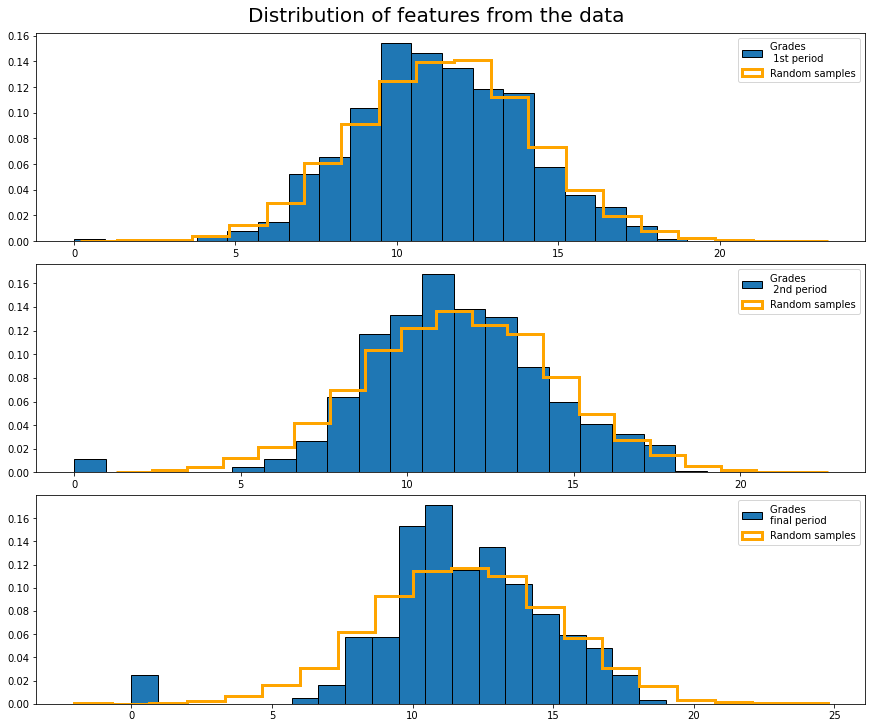

In [20]:
# Create distribution of features using subplots
fig, axes = plt.subplots(nrows = 3, figsize = (12, 10),
                        constrained_layout=True)

# Set up the parameters
cols = ['G1', 'G2', 'G3']
labels = ["Grades \n 1st period", 
          "Grades \n 2nd period", "Grades \nfinal period"]
title = "Distribution of features from the data"

# Create t distribution from random samples. 
# Add 10 to the t so each value ranges from 0 to 20 instead of -10 to 10
t = np.random.standard_t(df = 20, size = 20) + 10
cols = ["G1", "G2", "G3"]
samples = [np.random.normal(df[x].mean(), df[x].std(), 10000) for x in cols]

for ax, col, label, sample in zip(axes.flat, cols, labels, samples):
    ax.hist(df[col], edgecolor = 'black', bins = 20, label = label, density = True)
    ax.hist(sample, color = 'orange', bins = 20, label = "Random samples", 
            linewidth = 3, density = True, histtype = 'step')
   # sns.kdeplot(t, ax = ax, label = "Random sample data")
    ax.legend()
    
fig.suptitle(title, fontsize=20)   

plt.show()

## Dalc, Walc and tot_alc_consum: Poisson distributions
The columns Dalc, Walc and tot_alc_consum are Poisson distributed. That's becaus of the following reasons:
- The columns have an time indication: how much alcohol is consumed in the week?
- Based on the distribution plots, we can see that for all columns the higher the amount of alcohol consumed, the rarer the event is.
- In order to proof this choice further, we'll draw a Poisson distribution that's generated based on the most common value from the columns Dalc, Walc and tot_alc_consum.

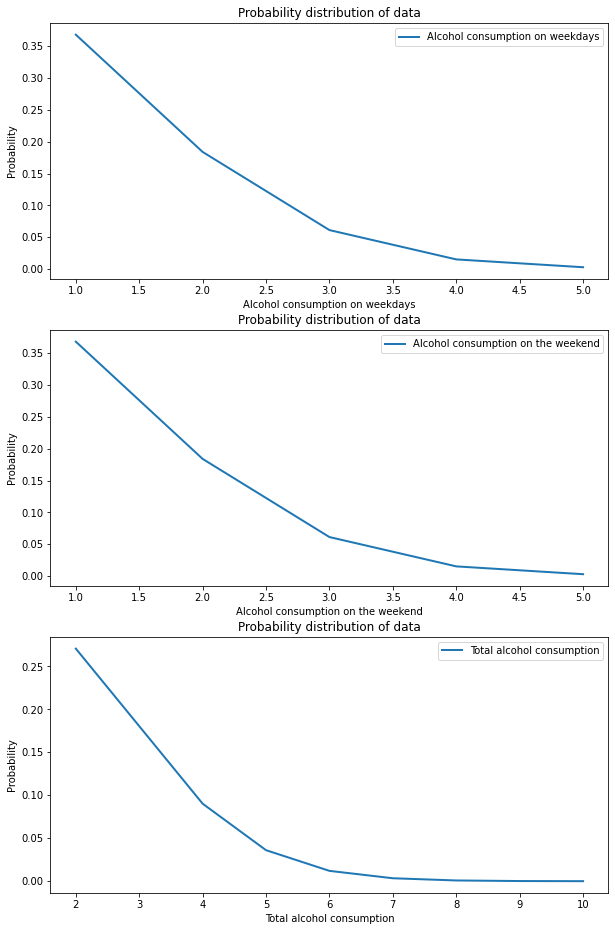

In [21]:
# Create figure and axis
fig, axes = plt.subplots(nrows = 3, figsize = (10,16))

# Set up parameters
cols = ['Dalc', 'Walc', 'tot_alc_consum']
xlabels = ["Alcohol consumption on weekdays", "Alcohol consumption on the weekend",
          "Total alcohol consumption"]
ylabel = "Probability"
title = "Probability distribution of data"

for ax, col, label in zip(axes.flat, cols, xlabels):
    data = df[col].sort_values()
    mu = df[col].mode().iloc[0]
    y = poisson.pmf(data, mu)
    ax.plot(data, y, label = label, linewidth = 2)
    ax.set_xlabel(label)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    
plt.show()

### Findings
Based on the distributions plots, we can see that the plots of the Poisson data and the real data are similar. That's why the data has a Poisson distribution.

# Hypothesis testing
In this chapter, the hypothesis testing will be performed. For this testing, we want to see if the students with higher alcohol consumption have a lower grade on average compared to the ones with lower alcohol consumption. This will be checked for all periods. We want to have a confidence interval of 95%, which means that the p-value has to be at least 0.05 to accept the null-hypothesis.
- Null hypothesis 1: There's no difference in grades from 1st period from students with high alcohol consumption, compared to students with low alcohol consumption.
- Null hypothesis 2: There's no difference in grades from 2nd period from students with high alcohol consumption, compared to students with low alcohol consumption.
- Null hypothesis 3rd: There's no difference in grades from 3rd period from students with high alcohol consumption, compared to students with low alcohol consumption.
Use paired t-tests for all hypothesis testing.

## Period 1
In this chapter, the hypothesis test for the first period will be performed. In order to perform it, we've gathered the following hypotesis.
- Null hypothesis: There's no difference in grades from 1st period from students with high alcohol consumption, compared to students with low alcohol consumption.
- Alternative hypothesis 1: students with higher alcohol consumption have __lower__ grades from the first period, compared to students with low alcohol consumption.
- Alternative hypothesis 2: students with higher alcohol consumption have __higher__ grades from the first period, compared to students with low alcohol consumption.

In [22]:
# Split the data into two groups: tot_alc_consum higher than 5 and lower
# and take random sample of 30
high_alc = df.loc[df['tot_alc_consum'] > 5, 'G1'].sample(n = 80)
low_alc = df.loc[df['tot_alc_consum'] <= 5, 'G1'].sample(n = 80)

# Perform the paired t-tests
stat, p = stats.ttest_rel(low_alc, high_alc)

print(f"The p-value is: {p}")
print(f"The test statistic comes out to be equal to: {stat}")

The p-value is: 0.04286596584451437
The test statistic comes out to be equal to: 2.058222497492211


### Findings
Based on the paired t-test, we see that the p-value is lower than 0.05. Hence, we'll reject the null hypothesis.

## Period 2
In this chapter, the hypothesis test for the second period will be performed. In order to perform it, we've gathered the following hypotesis.
- Null hypothesis: There's no difference in grades from second period from students with high alcohol consumption, compared to students with low alcohol consumption.
- Alternative hypothesis 1: students with higher alcohol consumption have __lower__ grades from the second period, compared to students with low alcohol consumption.
- Alternative hypothesis 2: students with higher alcohol consumption have __higher__ grades from the second period, compared to students with low alcohol consumption.

In [23]:
# Split the data into two groups: tot_alc_consum higher than 5 and lower
# and take random sample of 30
high_alc = df.loc[df['tot_alc_consum'] > 5, 'G2'].sample(n = 80)
low_alc = df.loc[df['tot_alc_consum'] <= 5, 'G2'].sample(n = 80)

# Perform the paired t-tests
stat, p = stats.ttest_rel(low_alc, high_alc)

print(f"The p-value is: {p}")
print(f"The test statistic comes out to be equal to: {stat}")

The p-value is: 0.002206252331343074
The test statistic comes out to be equal to: 3.1645038326793435


### Findings
Based on the paired t-test, we see that the p-value is lower than 0.05. Hence, we'll reject the null hypothesis.

## Period 3
In this chapter, the hypothesis test for the final period will be performed. In order to perform it, we've gathered the following hypotesis.
- Null hypothesis: There's no difference in grades from final period from students with high alcohol consumption, compared to students with low alcohol consumption.
- Alternative hypothesis 1: students with higher alcohol consumption have __lower__ grades from the final period, compared to students with low alcohol consumption.
- Alternative hypothesis 2: students with higher alcohol consumption have __higher__ grades from the final period, compared to students with low alcohol consumption.

In [24]:
# Split the data into two groups: tot_alc_consum higher than 5 and lower
# and take random sample of 30
high_alc = df.loc[df['tot_alc_consum'] > 5, 'G3'].sample(n = 80)
low_alc = df.loc[df['tot_alc_consum'] <= 5, 'G3'].sample(n = 80)

# Perform the paired t-tests
stat, p = stats.ttest_rel(low_alc, high_alc)

print(f"The p-value is: {p}")
print(f"The test statistic comes out to be equal to: {stat}")

The p-value is: 9.399002189929504e-09
The test statistic comes out to be equal to: 6.419507618934094


### Findings
Based on the paired t-test, we see that the p-value is lower than 0.05. Hence, we'll reject the null hypothesis.

# Conclusions
Based on our (distribution) plots and hypothesis testing, we can see that students with an higher amount of alcohol consumption have lower grades than those with lower alcohol consumption. In order to combat this, I'd recommend to educate the students about the possible negative side effects on high alcohol consumption. That way, students will be informed but remain the freedom to decide what to do with it.

I wouldn't recommend an alcohol age restriction or an entire prohibition, because of the following reasons:
- The students would still find their to consume alcohol.
- There's a change it could negatively impact the overall moral of the students.
- An restriction doesn't mean students will understand why. They still need to be informed about negative effects of alcohol.